In [166]:
# Importing all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix



In [167]:
#Loading CSV 
data = pd.read_csv("miami-housing.csv")

In [168]:
print(data.isna().sum())
print(data.shape)

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64
(13932, 17)


In [169]:
data = data.dropna()  # Drop missing values
print("Data has been Loaded & Cleaned:", data.shape)

Data has been Loaded & Cleaned: (13932, 17)


In [170]:
data = data.drop_duplicates()
print("✅ Duplicates Removed. New Shape:", data.shape)

✅ Duplicates Removed. New Shape: (13932, 17)


In [171]:
print(data.describe())

           LATITUDE     LONGITUDE      PARCELNO      SALE_PRC    LND_SQFOOT  \
count  13932.000000  13932.000000  1.393200e+04  1.393200e+04  13932.000000   
mean      25.728811    -80.327475  2.356496e+12  3.999419e+05   8620.879917   
std        0.140633      0.089199  1.199290e+12  3.172147e+05   6070.088742   
min       25.434333    -80.542172  1.020008e+11  7.200000e+04   1248.000000   
25%       25.620056    -80.403278  1.079160e+12  2.350000e+05   5400.000000   
50%       25.731810    -80.338911  3.040300e+12  3.100000e+05   7500.000000   
75%       25.852269    -80.258019  3.060170e+12  4.280000e+05   9126.250000   
max       25.974382    -80.119746  3.660170e+12  2.650000e+06  57064.000000   

       TOT_LVG_AREA  SPEC_FEAT_VAL     RAIL_DIST    OCEAN_DIST    WATER_DIST  \
count  13932.000000   13932.000000  13932.000000  13932.000000  13932.000000   
mean    2058.044574    9562.493468   8348.548715  31690.993798  11960.285235   
std      813.538535   13890.967782   6178.027333

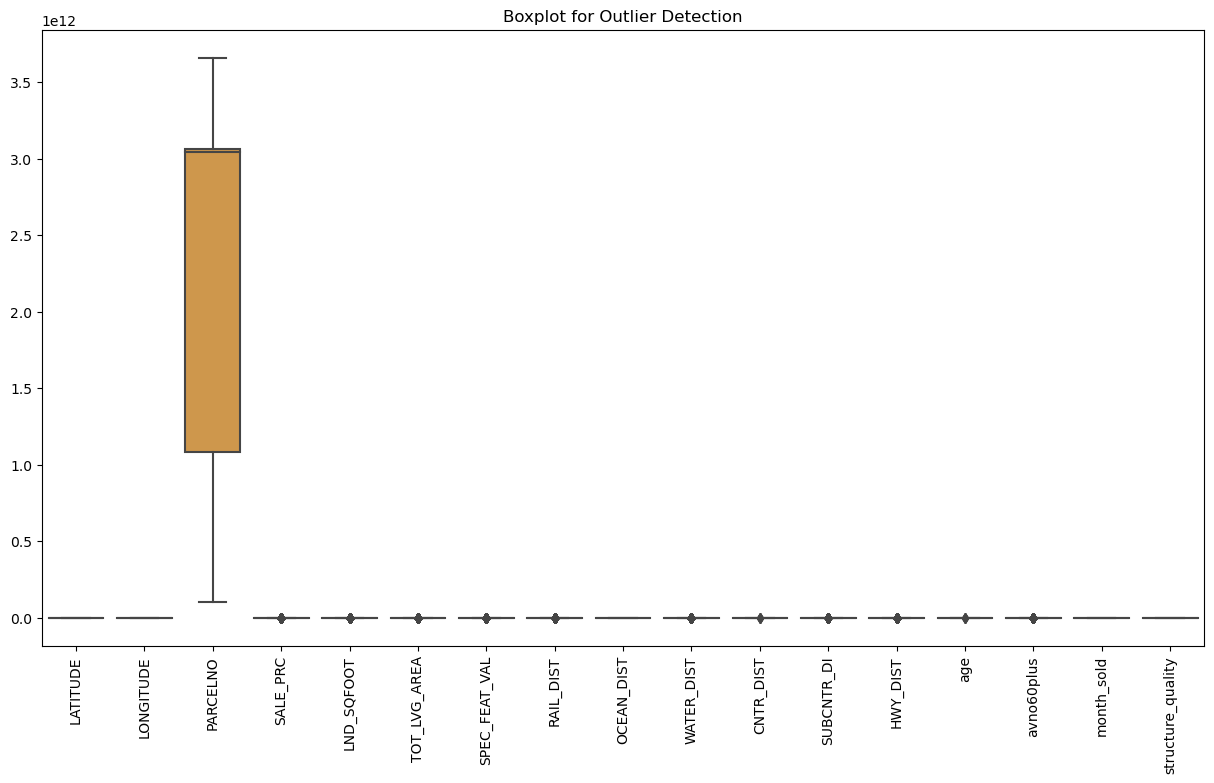

In [172]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [189]:
Q1 = data.quantile(0.25)  # 25th percentile
Q3 = data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

#Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data_pre = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
print("✅ Outliers Removed. New Shape:", data_pre.shape)

✅ Outliers Removed. New Shape: (11002, 16)


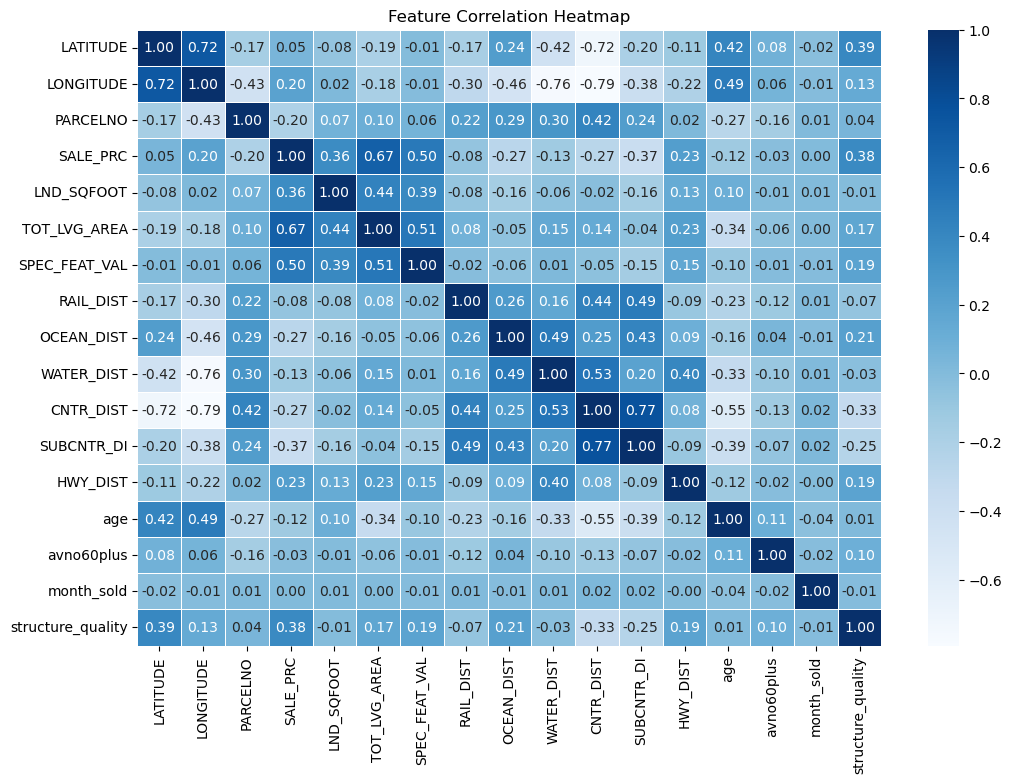

In [174]:

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [175]:
data['SALE_PRC'] = np.log1p(data['SALE_PRC'])

In [176]:
data = data.drop(columns=["LND_SQFOOT"])

In [177]:

X = data.drop(columns=['SALE_PRC'])  # Features
y = data['SALE_PRC']  # Target

In [178]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split: Train:", X_train.shape, "Test:", X_test.shape)


Data Split: Train: (11145, 15) Test: (2787, 15)


In [179]:

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # Fit & transform train data
X_test_s = scaler.transform(X_test)  # Transform test data

In [180]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [181]:
results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, r2, mae, rmse])
    predictions[name] = y_pred
    print(f"{name} -> R² Score: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Linear Regression -> R² Score: 0.7871, MAE: 0.1962, RMSE: 0.2618
Ridge Regression -> R² Score: 0.7871, MAE: 0.1962, RMSE: 0.2618
Lasso Regression -> R² Score: 0.6461, MAE: 0.2420, RMSE: 0.3375
ElasticNet Regression -> R² Score: 0.7223, MAE: 0.2183, RMSE: 0.2990
Decision Tree Regression -> R² Score: 0.8436, MAE: 0.1518, RMSE: 0.2244
Random Forest Regression -> R² Score: 0.9189, MAE: 0.1108, RMSE: 0.1615


In [182]:
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print("\n Model Performance Comparison:\n", results_df)


 Model Performance Comparison:
                       Model  R² Score       MAE      RMSE
0         Linear Regression  0.787067  0.196194  0.261812
1          Ridge Regression  0.787059  0.196197  0.261817
2          Lasso Regression  0.646146  0.241958  0.337504
3     ElasticNet Regression  0.722342  0.218313  0.298967
4  Decision Tree Regression  0.843554  0.151786  0.224414
5  Random Forest Regression  0.918944  0.110846  0.161533


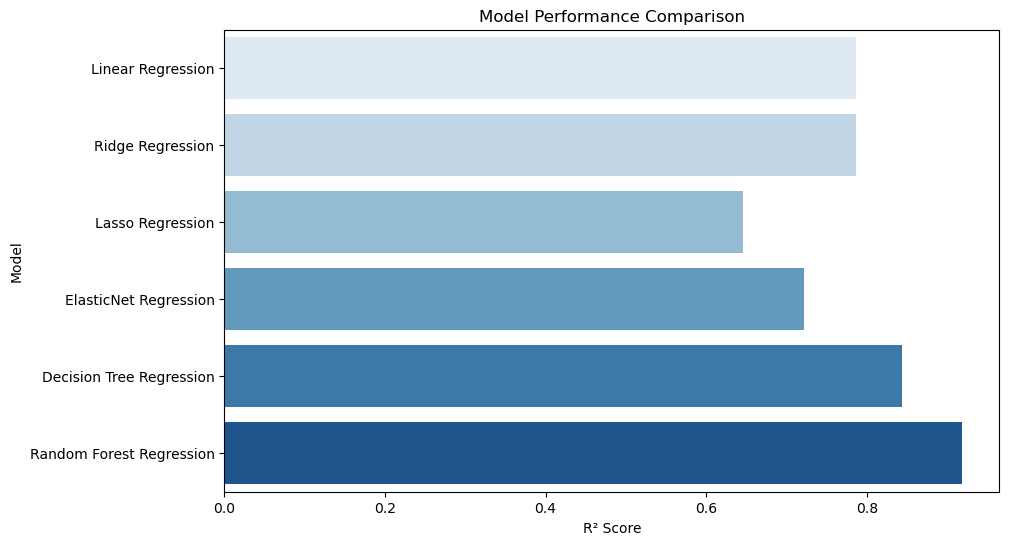

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["R² Score"], y=results_df["Model"], palette="Blues")
plt.xlabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()

In [184]:
best_model_name = results_df.iloc[results_df["R² Score"].idxmax()]["Model"]
best_model = models[best_model_name]
y_pred_best = predictions[best_model_name]

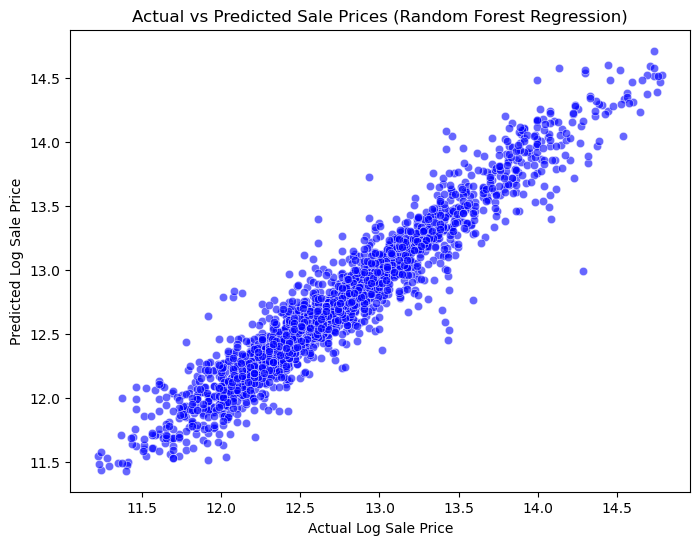

In [185]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color="blue")
plt.xlabel("Actual Log Sale Price")
plt.ylabel("Predicted Log Sale Price")
plt.title(f"Actual vs Predicted Sale Prices ({best_model_name})")
plt.show()

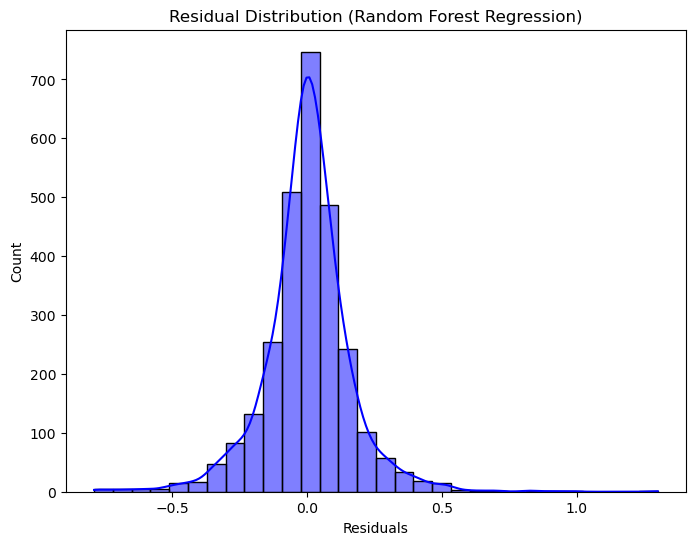

In [186]:
residuals = y_test - y_pred_best
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.xlabel("Residuals")
plt.title(f"Residual Distribution ({best_model_name})")
plt.show()

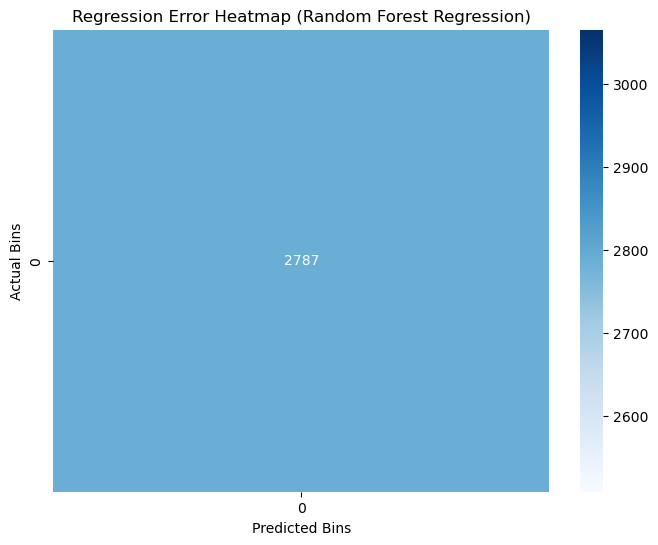

In [187]:

error_bins = np.linspace(min(residuals), max(residuals), 10)
y_test_binned = np.digitize(y_test, bins=error_bins)
y_pred_binned = np.digitize(y_pred_best, bins=error_bins)

conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Bins")
plt.ylabel("Actual Bins")
plt.title(f"Regression Error Heatmap ({best_model_name})")
plt.show()